In [1]:
import numpy as np

import time
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import itertools
from IPython.display import Markdown, display,HTML,Image

from z3 import *

### Puzzle as published 
https://www.janestreet.com/puzzles/number-cross-2-index/

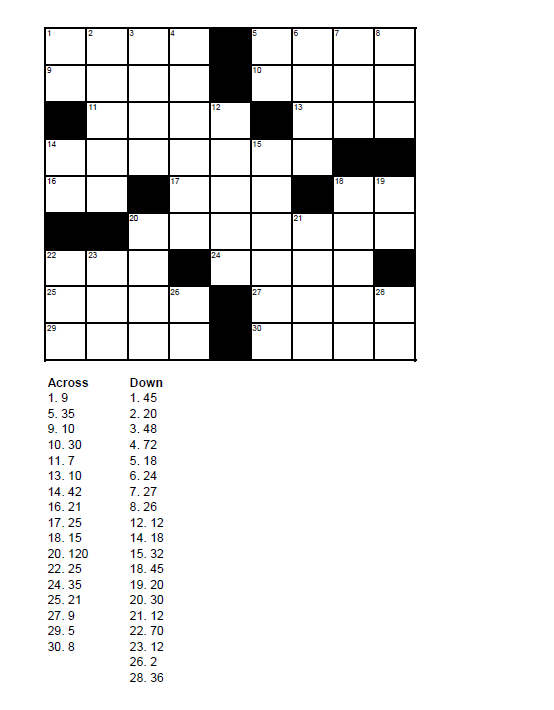

In [2]:
url='https://www.janestreet.com/puzzles/number-cross-2-index/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
display(Markdown('### Puzzle as published \n'+url))
display(Image('https://www.janestreet.com/puzzles/number_crossword_2.png',width=400))
HTML(str(soup.find_all('div', {'class' :'inner-wrapper'})[1]))

**Solved in 5.9102 seconds. Solution is: 276**

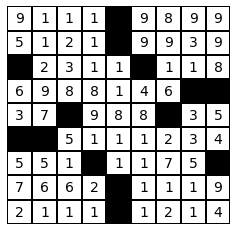

In [3]:
start = time.time()

grid = np.zeros((9,9))
grid[:2,4] = 1 ;grid[2,5] = 1;grid[2,0] =1;grid[3,7:9] =1;grid[4,2] =1
grid[4,6] =1;grid[5,:2] =1;grid[6,3] =1;grid[6,8] =1;grid[7:9,4] =1

# Setup # 9x9 matrix of integer variables and solver 
X = np.array(IntVector("x",9*9),dtype=object).reshape((9,9))
s = Tactic("qflia").solver()

# each cell contains a value 1-9 or is blocked
s += [And(e>0,e<=9) if grid[i,j] !=1 else e==0 for (i,j),e in np.ndenumerate(X)]

# clue by clue
def across(row,start,length,total):
    clue = [X[row,i] for i in range(start,start+length)]
    return  Or(Sum(clue)==total,Product(clue)==total)

def down(col,start,length,total):
    clue = [X[i,col] for i in range(start,start+length)]    
    return  Or(Sum(clue)==total,Product(clue)==total)
        
s += across(0,0,4,9) #1
s += across(0,5,4,35) #5
s += across(1,0,4,10) #9            
s += across(1,5,4,30) #10  
s += across(2,1,4,7)  #11  
s += across(2,6,3,10) #13   
s += across(3,0,7,42) #14  
s += across(4,0,2,21) #16  
s += across(4,3,3,25) #17 
s += across(4,7,2,15) #18 
s += across(5,2,7,120) #20
s += across(6,0,3,25) #22
s += across(6,4,4,35) #24
s += across(7,0,4,21) #25
s += across(7,5,4,9) #27
s += across(8,0,4,5) #29
s += across(8,5,4,8) #30

s += down(0,0,2,45) #1
s += down(1,0,5,20) #2
s += down(2,0,4,48) #3
s += down(3,0,6,72) #4
s += down(5,0,2,18) #5
s += down(6,0,4,24) #6
s += down(7,0,3,27) #7
s += down(8,0,3,26) #8
s += down(4,2,5,12) #12
s += down(0,3,2,18) #14
s += down(5,3,6,32) #15
s += down(7,4,5,45) #18
s += down(8,4,2,20) #19
s += down(2,5,4,30) #20
s += down(6,5,4,12) #21
s += down(0,6,3,70) #22
s += down(1,6,3,12) #23
s += down(3,7,2,2) #26
s += down(8,7,2,36) #28

# Solve and print 
if s.check() == sat:
    m = s.model()
    evalu = np.vectorize(lambda x:m.evaluate(x).as_long())
    r = evalu(X)
else:
    print("Failed")

display(Markdown("**Solved in {:.4f} seconds. Solution is: {:.0f}**".
                 format(time.time()-start,np.sum(r))))

fig,ax = plt.subplots(1,1,figsize=(4,4))
ax =sns.heatmap(grid,annot=r,cbar=False,cmap="Greys",
                fmt="",linewidths=2,annot_kws={"size":14,"color":"k"},linecolor='k')
ax.axis("off")
plt.show()


### Puzzle as published 
https://www.janestreet.com/puzzles/number-cross-2-solution/

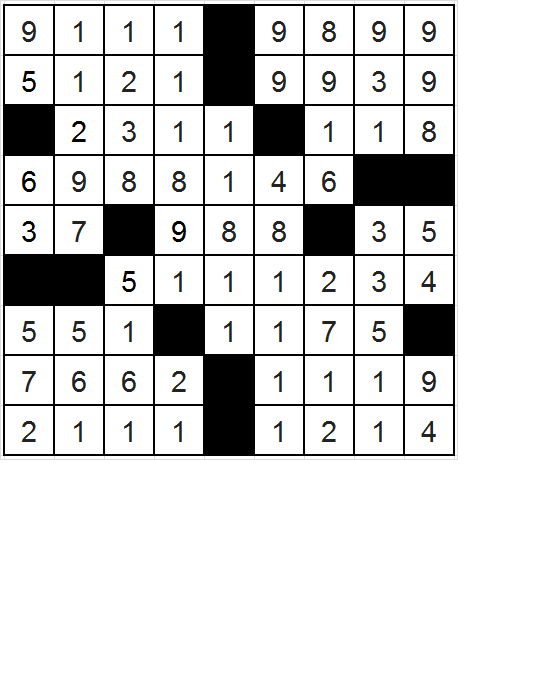

In [4]:
url='https://www.janestreet.com/puzzles/number-cross-2-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
display(Markdown('### Puzzle as published \n'+url))

display(HTML(str(soup.find_all('div', {'class' :'inner-wrapper'})[1])))
display(Image('https://www.janestreet.com/puzzles/number_crossword_2_solution.png',width=300))